# Bootstrap

In [2]:
!hostname

user01


In [ ]:
# %load_ext autoreload
# %autoreload 2

## Install

In [17]:
!pip install -U pandas fastai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.1/233.1 kB 274.9 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.6/67.6 kB 278.4 kB/s eta 0:00:00a 0:00:01


In [ ]:
!pip install -U scikit-learn umap-learn

     l     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/88.2 kB ? eta -:--:--━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/88.2 kB ? eta -:--:--━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/88.2 kB ? eta -:--:--━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━ 30.7/88.2 kB 337.0 kB/s eta 0:00:01━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━ 30.7/88.2 kB 337.0 kB/s eta 0:00:01━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━ 30.7/88.2 kB 337.0 kB/s eta 0:00:01━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━ 30.7/88.2 kB 337.0 kB/s eta 0:00:01━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━ 41.0/88.2 kB 147.7 kB/s eta 0:00:01━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━ 61.4/88.2 kB 218.4 kB/s eta 0:00:01━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━ 71.7/88.2 kB 220.7 kB/s eta 0:00:01━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━ 71.7/88.2 kB 220.7 kB/s eta 0:00:01━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━ 71.7/88.2 kB 220.7 kB/s eta 0:00:01━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 205.8 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... do

In [ ]:
!pip install torch torchvision torchaudio 

In [ ]:
!pip install git+https://github.com/NightMachinery/PyNight.git

  Cloning https://github.com/NightMachinery/PyNight.git to /tmp/pip-req-build-h06kbskt
  Running command git clone --filter=blob:none --quiet https://github.com/NightMachinery/PyNight.git /tmp/pip-req-build-h06kbskt
  Resolved https://github.com/NightMachinery/PyNight.git to commit f8909d49503b41fe3982fdca97f1def36113c54b
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
!pip install -U icecream 

In [ ]:
!pip install -U torchinfo

In [ ]:
!pip install jax jaxlib matplotlib

## Utils

In [3]:
from pynight.common_torch import TorchModelMode

In [4]:
# from torchsummary import summary
from torchinfo import summary

In [5]:
import torch

In [6]:
from icecream import ic

In [23]:
import jax

def torch_shape_get(input):
    def h_shape_get(x):
        return x.dtype, x.shape

    return jax.tree_map(h_shape_get, input)

# Convolutional Neural Networks
I this notebook, you'll get familiar with the implementation of CNNs by building and training two CNN networks.

## Preparing the Data
For this taks, you're going to use the [CIFAR10](https://www.cs.toronto.edu/~kriz/cifar.html) dataset. CIFAR10 is a collection of 32 * 32 images in 10 classes. Each image in CIFAR10 has three channels (RGB). You are going to download and prepare the dataset manually.

In [10]:
%matplotlib inline
from matplotlib import pyplot as plt
import os
import pandas as pd

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset
from torchvision.datasets.utils import download_url
from sklearn.model_selection import train_test_split
from torchvision.io import read_image

**For this question, it's highly recommended to use a CUDA-enabled environment.**
We'll check for the availability of GPU and set `device` accordingly.

In [11]:
device = (torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu'))
device

device(type='cuda')

In [12]:
url = "http://dl.dropboxusercontent.com/s/dywydpafhaamquw/cifar10.zip"
# Download the dataset using Torchvision's  `download_url`
#############################
# Your code goes here (1 point)
#############################
download_url(url, "./")
#############################
!unzip -qq "./cifar10.zip"

100%|███████████████████████████████████| 145997066/145997066 [00:40<00:00, 3585950.82it/s]


Now you are going to implement a custom dataset class for the data you've downloaded. You can implement a custom dataset by inheriting from PyTorch's `Dataset` class. You'll then have to override `__init__`, `__len__`, and `__getitem__` functinos in your custom class. One of the advantages of defining a custom dataset like this is that you have complete control over the data that the dataset returns.

The the dataset you've downloaded has the following structure:
```
cifar10/
    test/
        img_file1.png
        img_file2.png
        ..
        ..
        annotation.csv
    train/
        img_file1.png
        img_file2.png
        ...
        ...
        annotation.csv
```

The `annotation.csv` file in each directory contains a complete list of file names and labels for all the image files in that directory. **Keep in mind that the csv files provided have no header information**.

In [13]:
class CustomCifarDataset(Dataset):
    def __init__(self, annotations_file, root_dir, transform=None):
        """
        `annotation_file`: Path to the csv file with annotations.
        `root_dir`: Directory with all the images.
        `transform`: Transform to be applied.
        """
        self.root_dir = root_dir
        self.transform = transform
        # Read the csv annotation file using pandas' `read_csv` function.
        # (The annotation file consists of n rows. Each row is in the format 
        #    img_file_name, img_label
        #  For example:
        #    airplane_1001, 0
        # )
        #############################
        # Your code goes here (2 points)
        self.annotations = pd.read_csv(annotations_file)
        #############################

    def __len__(self):
        # Return the number of data points
        #############################
        # Your code goes here (1 point)
        return len(self.annotations)
        #############################

    def __getitem__(self, idx):
        """
        idx: index of the data point referenced.
        """
        # Use `idx` to index the annotation file you parsed in `__init__`.
        # Using `read_image`, load the corresponding image from the disk.
        # Normalize the data to be between 0 and 1.
        # Apply transformation(s) to the image and return the transformed 
        # image and its label.
        #############################
        # Your code goes here (7 points)
        img_file_name = self.annotations.iloc[idx, 0]
        img_label = self.annotations.iloc[idx, 1]
        
        img_path = os.path.join(self.root_dir, img_file_name)
        img = read_image(img_path).float() / 255.0

        if self.transform:
            img = self.transform(img)

        return img, img_label
        #############################

In [15]:
test_set = CustomCifarDataset("./cifar10/test/annotation.csv", "./cifar10/test/")
train_set = CustomCifarDataset("./cifar10/train/annotation.csv", "./cifar10/train/")

In [24]:
torch_shape_get(train_set[0])

((torch.float32, torch.Size([3, 32, 32])), (dtype('int64'), ()))

ic| tmp.shape: torch.Size([32, 32, 3])


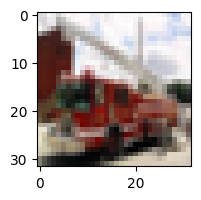

In [28]:
f = plt.figure(figsize=(2, 2))

tmp = train_set[0][0].permute(1, 2, 0)
ic(tmp.shape)
plt.imshow(tmp)
plt.show()

In [40]:
# Split your training set into train and validation sets (8:2 ratio).
#############################
# Your code goes here (2 points)
train_set, val_set = train_test_split(train_set, test_size=0.2)
#############################

len(train_set), len(val_set), len(test_set)

(39999, 10000, 9999)

In [41]:
# Construct three `DataLoader`s for validation, training, and test sets.
# Use a batch size of 128.
# No shuffling.
#############################
# Your code goes here (5 points)
batch_size = 128
# batch_size = 2048
# batch_size = 2**16
ic(batch_size)

shuffle = False

train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=shuffle)
val_loader = torch.utils.data.DataLoader(val_set, batch_size=batch_size, shuffle=shuffle)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=batch_size, shuffle=shuffle)
#############################

ic| batch_size: 128


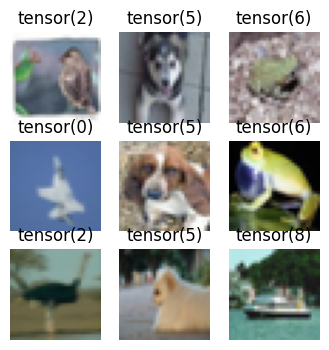

In [68]:
import fastai.torch_core

b1 = next(iter(train_loader))
b1_imgs = b1[0]
b1_labels = b1[1]
# ic(
#    torch_shape_get(b1_imgs))
# ic(torch_shape_get(b1_labels))

n = 9

fastai.torch_core.show_image_batch(
    (b1_imgs[:n],
     b1_labels[:n],),
    items=n,
    figsize=(4, 4),
)

In [90]:
import copy
import math


def train(n_epochs, optimizer, model, loss_fn, train_loader, val_loader, patience=10):
    model.train()
    
    best_validation_loss = math.inf
    best_model_state = None
    epochs_without_improvement = 0

    for epoch in range(1, n_epochs + 1):
        loss_train = 0.0
        for imgs, labels in train_loader:
            # Compute model's ouptut
            # Move your data to GPU if it's available
            ##############################
            # Your code goes here (5 points)
            imgs = imgs.to(device)
            labels = labels.to(device)
            ##############################

            # Compute the loss.
            # Also, use L2 regularization to compute the total loss: `loss + lambda * l2`
            # Set the lambda to 0.001.
            ##############################
            # Your code goes here (7 points)
            loss = loss_fn(model(imgs), labels)
            penalty_weight = 0.001
            l2 = sum(p.pow(2.0).sum() for p in model.parameters())
            loss_final = loss + penalty_weight * l2
            ##############################

            # Do the backprop step.
            ##############################
            # Your code goes here (2 points)
            optimizer.zero_grad()
            loss_final.backward()
            optimizer.step()
            ##############################
            
            loss_train += loss.item()

        validation_loss = validate(model, val_loader, loss_fn)
        if validation_loss < best_validation_loss:
            best_validation_loss = validation_loss
            best_model_state = copy.deepcopy(model.state_dict())
            epochs_without_improvement = 0
        else:
            epochs_without_improvement += 1

            
        print('Epoch {}, Training loss {}, Validation loss {}'.format(epoch, loss_train / len(train_loader), validation_loss))

        if epochs_without_improvement >= patience:
            print("Early stopping triggered. Stopping training.")
            break
    
    model.load_state_dict(best_model_state)
    
    validation_loss = validate(model, val_loader, loss_fn)
    print(f"best model has validation_loss={validation_loss}")
    return validation_loss


In [86]:
def validate(model, val_loader, loss_fn):
        with torch.no_grad(), TorchModelMode(model, 'eval'):
            val_loss = 0.0
            for imgs, labels in val_loader:
                # Compute the loss
                ##############################
                # Your code goes here (9 points)
                imgs = imgs.to(device)
                labels = labels.to(device)

                loss = loss_fn(model(imgs), labels)
                ##############################
                val_loss += loss.item()

        return val_loss / len(val_loader)

**Answer the following questions (5 points):**
- What is `torch.no_grad()` and when is it used?

    disables tracking the computational graph and the gradients. 

    It's used when we do not need to do backprop, i.e., when doing inference or validation.

- What do the instructions `model.eval()` and `model.train()` do?

    Change the model training mode; Some layers like BatchNorm will use the stored batch constants when in eval mode, and use the real batch when in train mode. (In inference, there can be a batch of one which won't have a meaningful mean or std.)

In [71]:
def test(model, test_loader):
  model.eval()
  correct = 0
  total = 0
  with torch.no_grad():
    for imgs, labels in test_loader:
      # Compute the predicted class and update 
      # `total` and `correct` accordingly
      ##############################  
      # Your code goes here (9 points)
      imgs = imgs.to(device)
      labels = labels.to(device)

      preds = model(imgs)
      preds = torch.argmax(preds, 1)

      correct += torch.sum(preds == labels).item()
      total += len(labels)
      ##############################

    return correct / total

## Creating the Model
Now you're going to build the CNN model. The overall architecture of the model you are going to implement is depicted in the following picture (All of the max poolings used have a stride of 2*2):

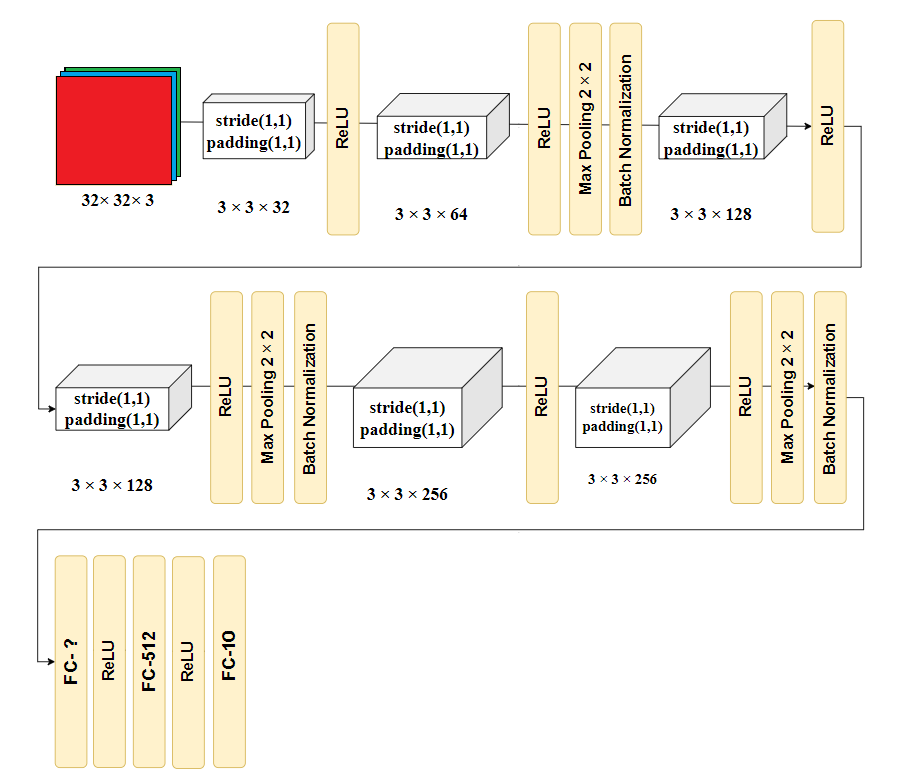

In [72]:
class SimpleCNN(nn.Module):
    def __init__(self, in_channels, out_dim):
        """
        `in_channels`: Number of channels for input instances
        `out_dim`    : The network's output dimensions
        """
        super().__init__()
        self.relu = nn.ReLU()            # Apply for all the layers (except the last one)
        self.maxpool = nn.MaxPool2d(2,2) # Apply for conv2, conv4, and conv6
        
        self.bn1 = nn.BatchNorm2d(64) # Apply for conv2
        self.bn2 = nn.BatchNorm2d(128) # Apply for conv4
        self.bn3 = nn.BatchNorm2d(256) # Apply for conv6
        
        self.conv1 = self.conv2 = self.conv3 = self.conv4 = self.conv5 = self.conv6 = None
        self.fc1 = self.fc2 = self.fc3 = None

        
        # Create five 2D convolutional layers (conv1 through conv6)
        # Set the padding and stride to 1 for all the layers.
        # Use 3*3 kernels.
        ##############################
        # Your code goes here (10 points)
        self.conv1 = nn.Conv2d(in_channels, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.conv4 = nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1)
        self.conv5 = nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1)
        self.conv6 = nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1)
        ##############################

        self.flatten = nn.Flatten()
        
        # According to the output dimensions of `conv6` and the `in_features` value for fc2,
        # set `in_features` and `out_features` for fc1 to proper values. 
        ##############################
        # your code goes here (5 points)
        self.fc1 = nn.LazyLinear(1024)
        #############################
        self.fc2 = nn.Linear(1024, 512)
        self.fc3 = nn.Linear(512, out_dim)
        
    def forward(self, x):
        # Move x thorugh the network and return the output
        # according to the architecture.
        ##############################
        # Your code goes here (10 points)
        x = self.conv1(x)
        x = self.relu(x)
        x = self.conv2(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = self.bn1(x)
        x = self.conv3(x)
        x = self.relu(x)
        x = self.conv4(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = self.bn2(x)
        x = self.conv5(x)
        x = self.relu(x)
        x = self.conv6(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = self.bn3(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        out = self.fc3(x)
        ##############################
        return out

In [93]:
model = SimpleCNN(3, 10).to(device=device)

/home/user01/miniconda3/lib/python3.10/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


In [79]:
b1_imgs_dv = b1_imgs.to(device)
ic(torch_shape_get(b1_imgs_dv))

summary(model, input_data=b1_imgs_dv)

ic| torch_shape_get(b1_imgs_dv): (torch.float32, torch.Size([128, 3, 32, 32]))
/home/user01/miniconda3/lib/python3.10/site-packages/torchinfo/torchinfo.py:477: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  action_fn=lambda data: sys.getsizeof(data.storage()),
/home/user01/miniconda3/lib/python3.10/site-packages/torch/storage.py:665: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return super().__sizeof__() + self.nbytes()


Layer (type:depth-idx)                   Output Shape              Param #
SimpleCNN                                [128, 10]                 --
├─Conv2d: 1-1                            [128, 32, 32, 32]         896
├─ReLU: 1-2                              [128, 32, 32, 32]         --
├─Conv2d: 1-3                            [128, 64, 32, 32]         18,496
├─ReLU: 1-4                              [128, 64, 32, 32]         --
├─MaxPool2d: 1-5                         [128, 64, 16, 16]         --
├─BatchNorm2d: 1-6                       [128, 64, 16, 16]         128
├─Conv2d: 1-7                            [128, 128, 16, 16]        73,856
├─ReLU: 1-8                              [128, 128, 16, 16]        --
├─Conv2d: 1-9                            [128, 128, 16, 16]        147,584
├─ReLU: 1-10                             [128, 128, 16, 16]        --
├─MaxPool2d: 1-11                        [128, 128, 8, 8]          --
├─BatchNorm2d: 1-12                      [128, 128, 8, 8]          256

In [82]:
# model = torch.compile(model)

In [94]:
# Use Adam optimizer with a learning rate of 0.001 as the optimizer.
# Use CrossEntropy as loss function.
##############################
# Your code goes here (5 points)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.CrossEntropyLoss()
##############################
train(
    n_epochs = 100,
    optimizer = optimizer,
    model = model,
    loss_fn = loss_fn,
    train_loader = train_loader,
    val_loader=val_loader
)

Epoch 1, Training loss 1.2962594889223384, Validation loss 1.0430791838259637
Epoch 2, Training loss 0.8485155316968315, Validation loss 1.0559125052222722
Epoch 3, Training loss 0.6956633915916418, Validation loss 0.9669795572003231
Epoch 4, Training loss 0.5954924235328699, Validation loss 0.8660407881193524
Epoch 5, Training loss 0.5250503552226594, Validation loss 0.8828084687643414
Epoch 6, Training loss 0.4601634531356275, Validation loss 0.879090039035942
Epoch 7, Training loss 0.41253223972389114, Validation loss 0.9822410096096087
Epoch 8, Training loss 0.36435813978076365, Validation loss 0.7963809039019332
Epoch 9, Training loss 0.3356196344755709, Validation loss 0.790142652354663
Epoch 10, Training loss 0.29592381946195045, Validation loss 0.7539552201198626
Epoch 11, Training loss 0.2648818965394276, Validation loss 0.6897064285187782
Epoch 12, Training loss 0.24614248991298218, Validation loss 0.7585352787488624
Epoch 13, Training loss 0.23060570942898528, Validation los

0.6611573779130284

In [95]:
test(model, test_loader)

0.8011801180118012

## Visualizing Feature Maps

The feature maps, also known as activation maps, record what happens when the filters are applied to an input.


In this section, you're going to visualize feature maps for a random input image for layers `conv1` through `conv6`. 

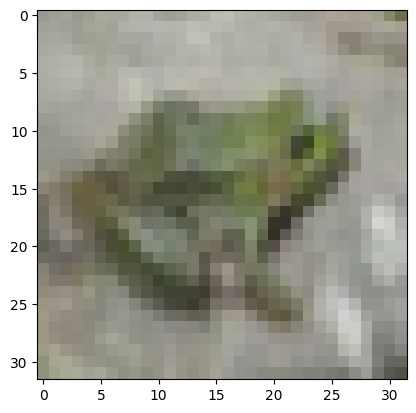

In [96]:
import random
img = train_set[random.randint(0, len(train_set))][0]
plt.imshow(img.permute(1,2,0))
plt.show()

In [99]:
conv_layers = [model.conv1, model.conv2, model.conv3, model.conv4, model.conv5, model.conv6]

# Pass `img` thorough the layers and save the results for each layer in `output`.
##############################
# Your code goes here (5 points)
outputs = [img, ]

x = img.unsqueeze(0)
x = x.to(device)
ic(x.shape)
for l in conv_layers:
    x = l(x)

    outputs.append(x.squeeze(0))

ic(torch_shape_get(outputs))
##############################
len(outputs)

ic| x.shape: torch.Size([1, 3, 32, 32])
ic| torch_shape_get(outputs): [(torch.float32, torch.Size([3, 32, 32])),
                               (torch.float32, torch.Size([32, 32, 32])),
                               (torch.float32, torch.Size([64, 32, 32])),
                               (torch.float32, torch.Size([128, 32, 32])),
                               (torch.float32, torch.Size([128, 32, 32])),
                               (torch.float32, torch.Size([256, 32, 32])),
                               (torch.float32, torch.Size([256, 32, 32]))]


7

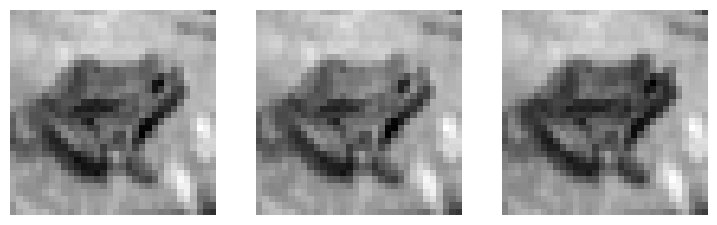

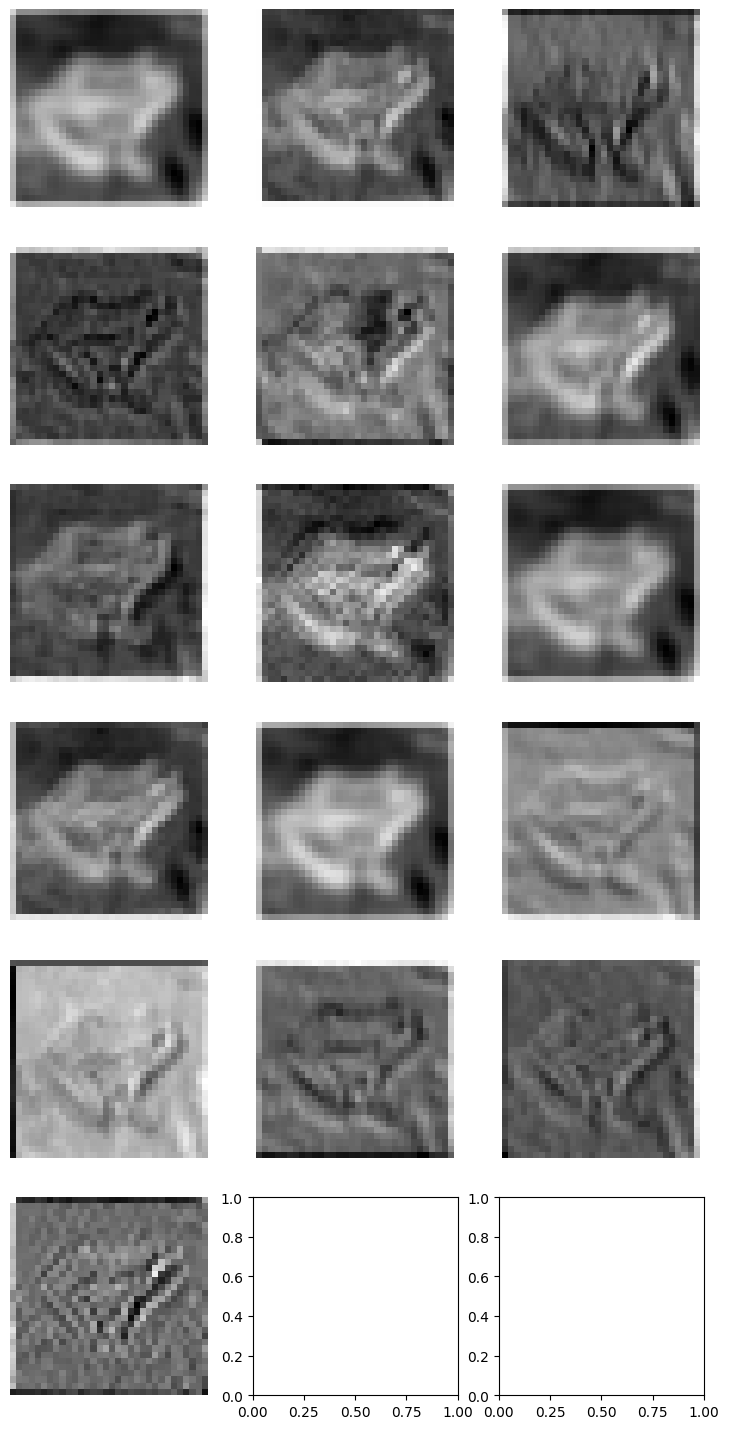

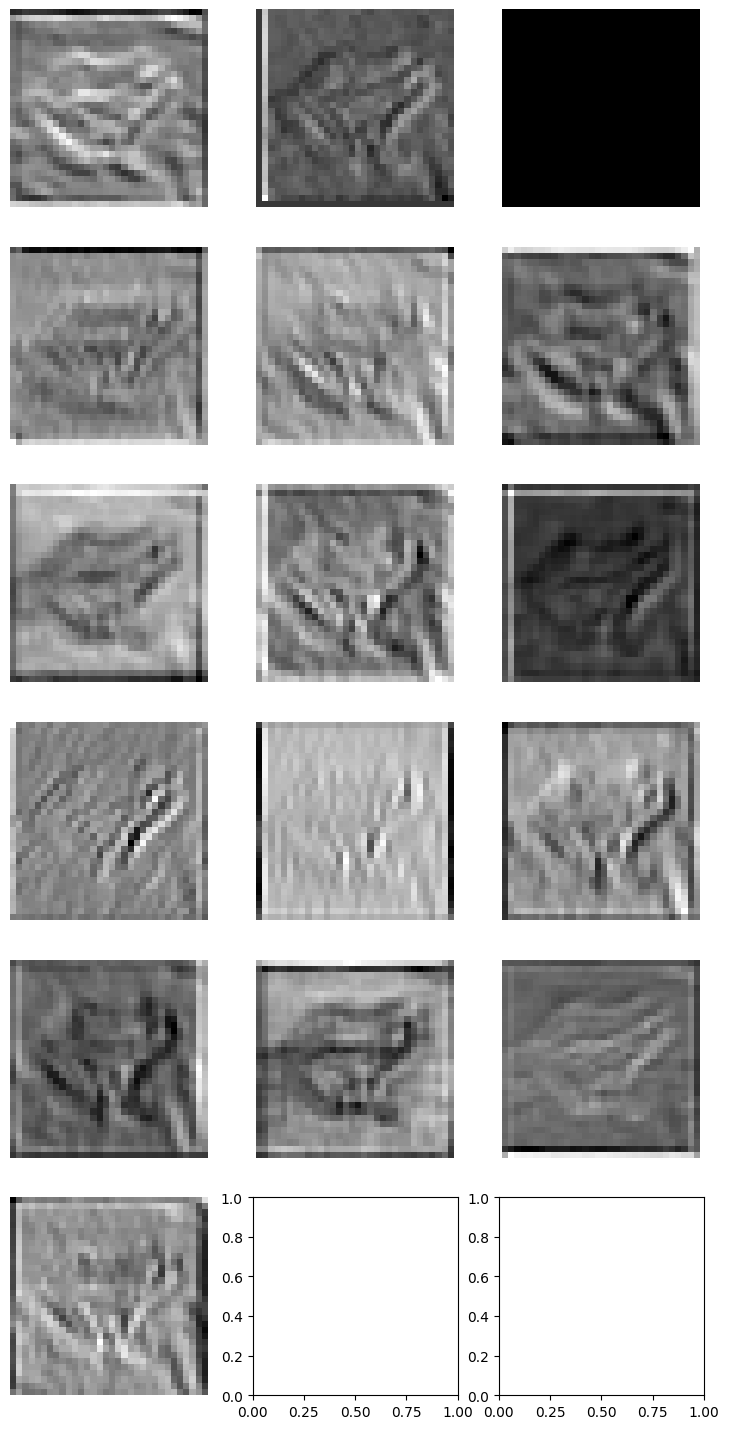

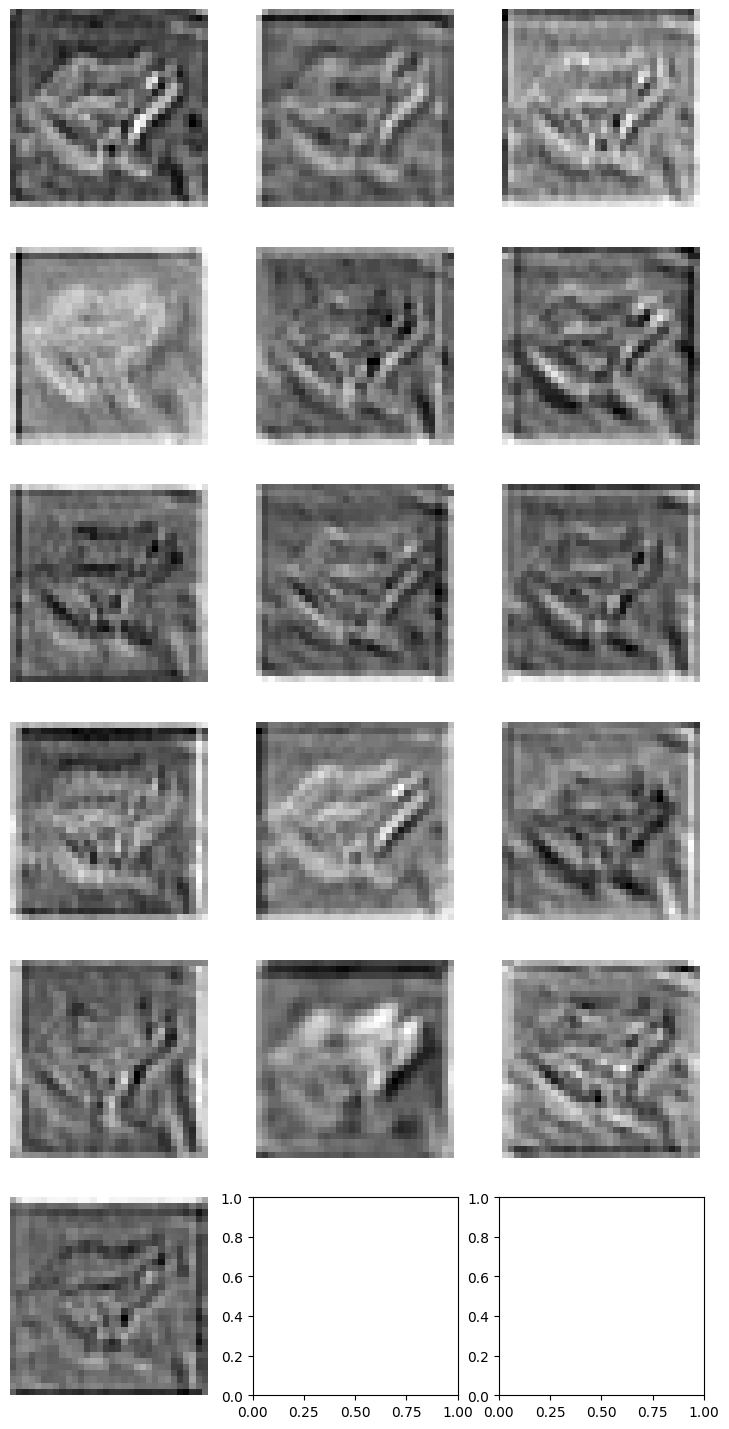

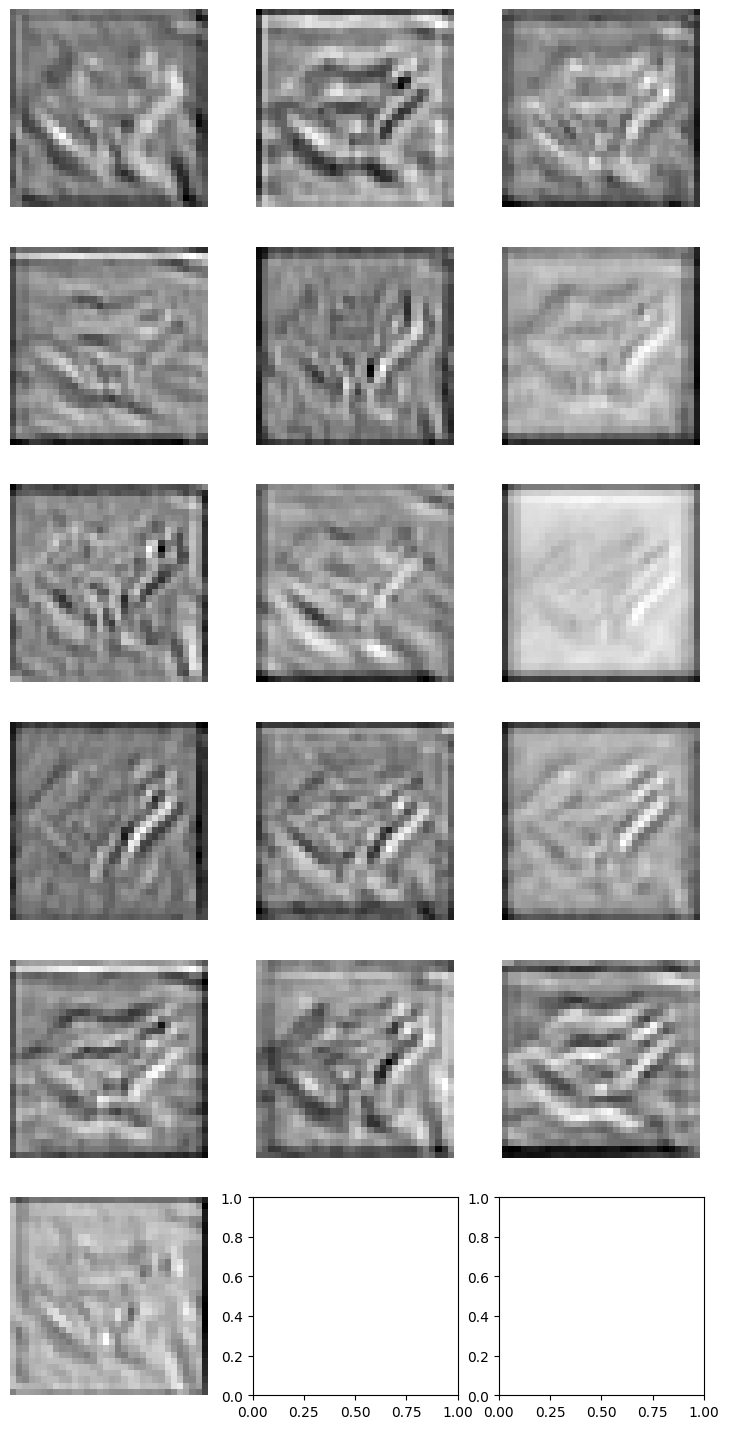

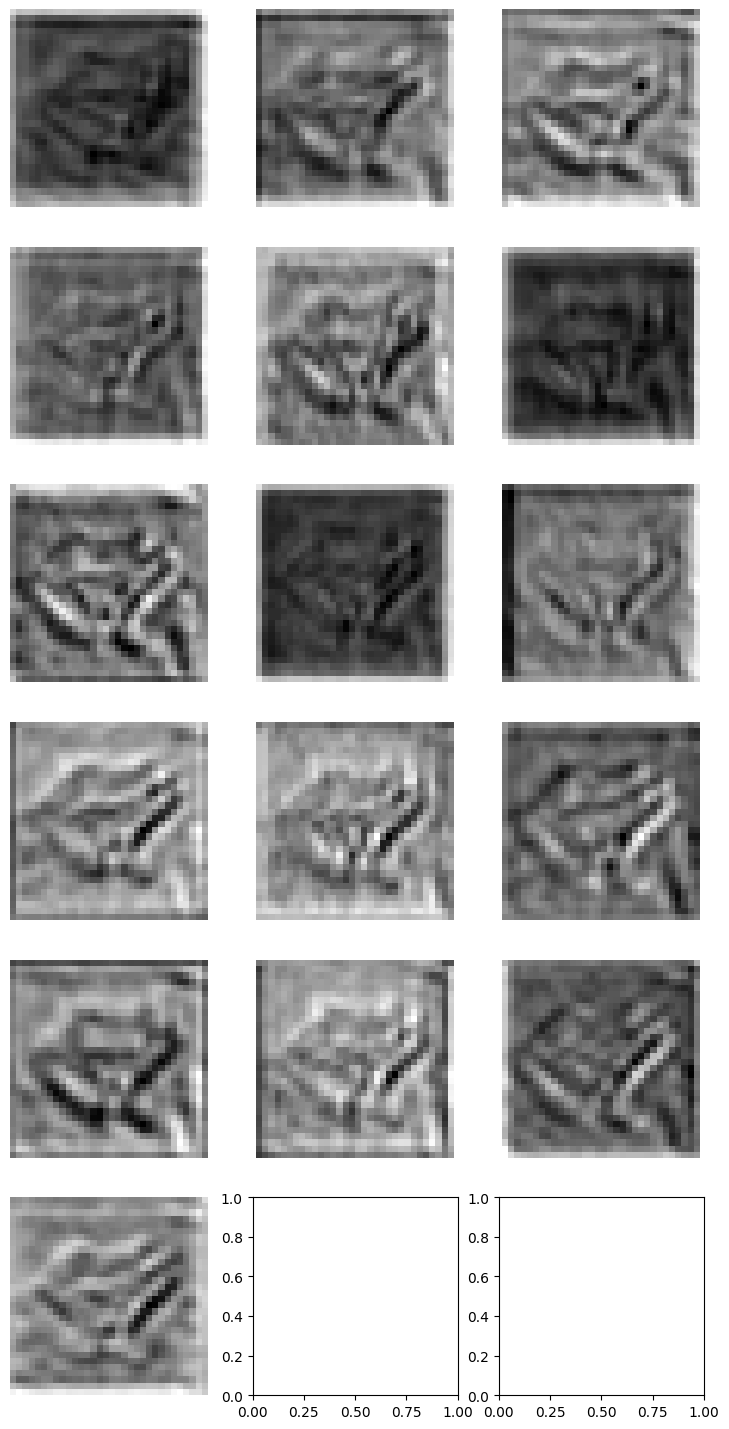

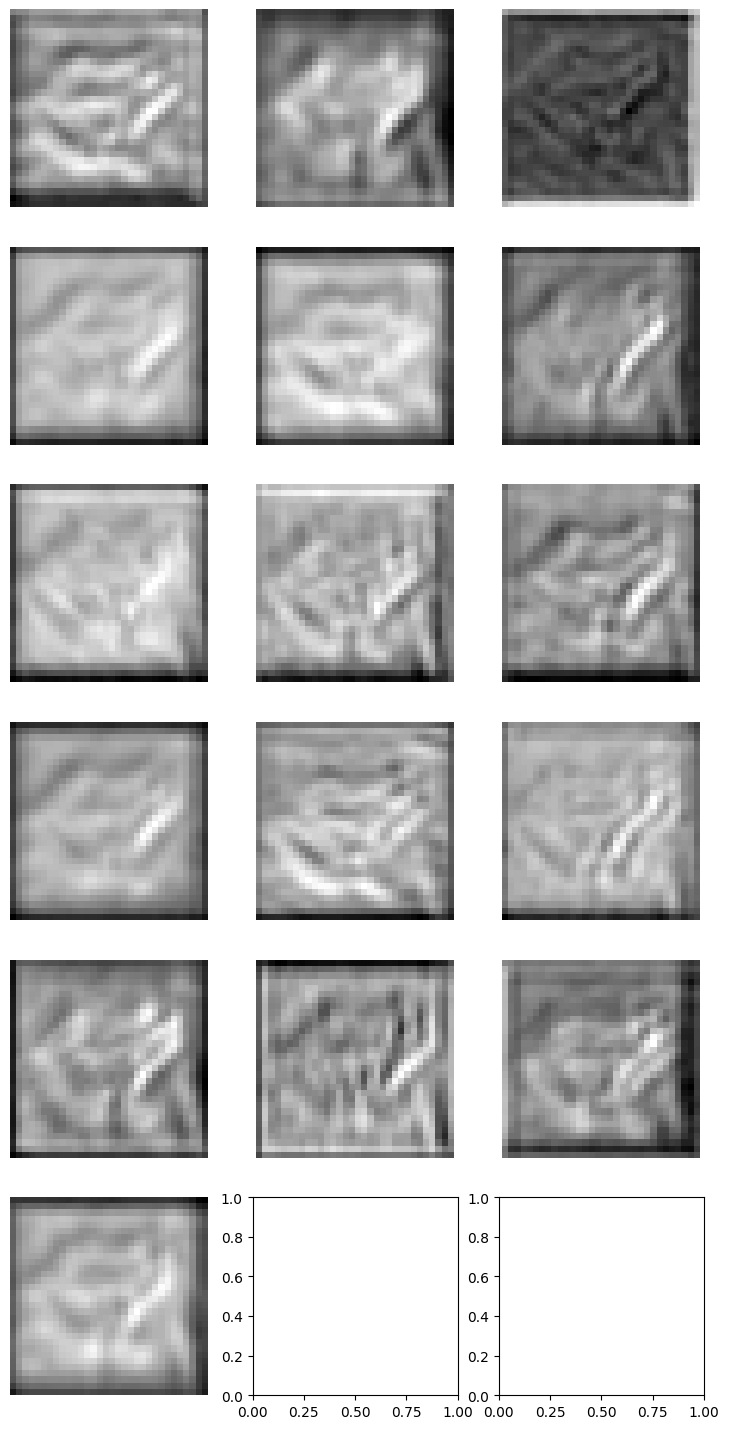

In [109]:
# Visualize the output for the first 16 filters of each layer.
##############################
# Your code goes here (5 points)
outputs_16 = [o[:16] for o in outputs]
# ic(torch_shape_get(outputs_16))

for o in outputs_16:
    filters = [o[i] for i in range(len(o))]
    labels = ["" for i in range(len(filters))]
    # ic(torch_shape_get(filters))
    
    fastai.torch_core.show_image_batch(
        (filters, labels),
        items=len(filters),
        cmap='gray',
    )
##############################

**Answer the following question (5 points):**
- Which one of the feature maps you visualized do you find helpful for the task? Which ones you don't find helpful?

The feature maps of the first layers are not that different from the input, and so are very helpful for us humans. Some of these layers seem to extract curves and edges of the image, sometimes with a specific angle.

The later layers start to extract more abstract features which are difficult for humans to interpret but easier for the network to classify.

Some of the feature maps are completely blank, these are obviously not useful, at least for this image.